#NeuralNetworks


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import io, special
import numpy as np
from __future__ import division
%matplotlib inline

C:\Users\TJ\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sigmoid = sp.expit


In [ ]:
class NeuralNetwork:
    '''
        Defines a class structure for handling nueral networks
    '''
    
    def __init__(self,num_hidden_layers, num_units_per_layer)
        self.num_hidden_layers = num_hidden_layers
        self.num_units_per_layer = num_units_per_layer
        self.thetas = 
        
    def init_thetas(n,m):
        epsilon = np.sqrt(6)/np.sqrt(n+m)
        return np.random.rand(n,m) * 2 * epsilon - epsilon
    

In [2]:
data = sio.loadmat('ex4data1.mat')
weights = sio.loadmat('ex4weights.mat')

In [4]:
def sigmoid_grad(x):
    return sigmoid(x)*(1-sigmoid(x))

In [5]:
def cost(X, y, Thetas, reg_const=1):
    
    _cost = 0
    index = 0
    for example in X:
        
        _output = output(example,Thetas)
        _output = np.roll(_output,1)
        _cost += sum(-y[index] * np.log(_output) - (1 - y[index]) * np.log(1-_output))
        index +=1
        
    if reg_const<=0:
        return (1/len(X)) * _cost
            
    
    else:
        reg = 0
        for Theta in Thetas:
            reg += sum(Theta.ravel()**2)
            
        return (1/len(X)) * (_cost + (reg_const/2)*reg)


In [6]:
def output(image, Thetas):
    def output(image, Thetas, depth):
        Theta = Thetas[depth]
        image = np.insert(image,0,1)
        
        if depth == len(Thetas) - 1:
            return sigmoid(Theta.dot(image))
        
        
        return output(sigmoid(Theta.dot(image)), Thetas, depth = depth + 1)
    return output(image, Thetas, 0)
    

In [9]:
def categorize(outputs):
    
    # Initialize list
    predictions = []
    
    # For each image, calculate the classification
    for output in outputs:
        predictions.append(np.argmax(output))

    return predictions


def nnPredict(X,Thetas):

    # Initialize list
    predictions = []
    
    # For each image, calculate the classification
    for example in X:
        predictions.append(np.argmax(output(example,Thetas)))

    return predictions


In [10]:
neural_net = nnPredict(trainingImages,Thetas)
neural_net = np.array([(label+1)%10 for label in neural_net])

In [14]:
cost(trainingImages,_digits,Thetas,reg_const=0)

0.28762916516131892

In [15]:
sum(neural_net == digits_fl)/len(neural_net)

0.97519999999999996

In [12]:
_digits = np.zeros((5000,10))

In [13]:
for index in range(len(_digits)):
    _digits[index][digits_fl[index]] = 1

In [16]:
test = trainingImages[0,:]

In [69]:
total = 0
for index in range(len(trainingImages)):
    a = np.roll(output(trainingImages[index,:],Thetas),1)
    total += cost(a, _digits[index])
total += reg_cost(Thetas, reg_const=1)

In [70]:
(1/5000) * total

0.38448779624289375

In [39]:

a = np.roll(output(trainingImages[1,:],Thetas),1)
cost(a, _digits[1], Thetas,reg_const=0)

0.0035032404942903191

In [23]:
(1/len(y)) * sum(-y * np.log(output) - (1 - y) * np.log(1-output))

NameError: name 'y' is not defined

In [28]:
output(trainingImages[500,:],Thetas)

array([  9.81212670e-01,   1.77130603e-02,   1.98089679e-03,
         1.63701228e-03,   1.66140183e-03,   7.79555251e-04,
         1.70240546e-03,   1.07248964e-02,   1.25880085e-04,
         3.00769987e-04])

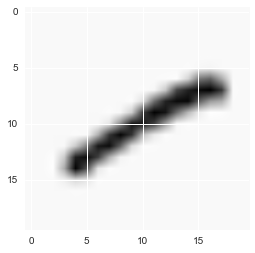

In [29]:
plt.imshow(trainingImages[500,:].reshape(20,20))

In [56]:
Thetas[0].ravel()

array([ -2.25623899e-02,  -1.05624163e-08,   2.19414684e-09, ...,
        -1.80365926e-06,  -8.14464807e-06,   8.79454531e-09])

In [ ]:
def feedforward(images,Thetas):

    # Initialize list
    neural_net = []
    
    
    def output(image, Thetas, depth=0):

        Theta = Thetas[depth]
        image = np.insert(image,0,1)
        
        
        
        if depth == len(Thetas) - 1:
            return sigmoid(Theta.dot(image))
        
        
        return output(sigmoid(Theta.dot(image)), Thetas, depth = depth + 1)
    
    # For each image, calculate the classification
    for image in images:
        neural_net.append(np.argmax( output(image,Thetas)))

    return neural_net


neural_net = feedforward(trainingImages, Thetas)

# Convert matlabs labeling to our own
neural_net = np.array([(label+1)%10 for label in neural_net])